# Preprocessing 

In [2]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## Transfer Data 

In [4]:
transferData = pd.read_csv('transferData.csv')
transferData

,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee
0,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee
1,luca-mazzitelli,24/25,"Jun 30, 2025",Como,Frosinone,€4.00m,End of loan
2,luca-mazzitelli,24/25,"Jul 26, 2024",Frosinone,Como,€4.00m,loan transfer
3,luca-mazzitelli,23/24,"Jul 1, 2023",Monza,Frosinone,€3.00m,?
4,luca-mazzitelli,22/23,"Jun 30, 2023",Frosinone,Monza,€3.00m,End of loan
...,...,...,...,...,...,...,...
156753,curtis-yebli,18/19,"Aug 8, 2018",Bari,Arsenal Kyiv,€100k,free transfer
156754,curtis-yebli,17/18,"Jun 30, 2018",Arezzo,Bari,€100k,End of loan
156755,curtis-yebli,17/18,"Jul 11, 2017",Bari,Arezzo,€75k,loan transfer
156756,curtis-yebli,16/17,"Jul 1, 2016",Bari U19,Bari,€50k,-


In [6]:
transferData = transferData.drop(index=0)  

In [8]:
transferData

,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee
1,luca-mazzitelli,24/25,"Jun 30, 2025",Como,Frosinone,€4.00m,End of loan
2,luca-mazzitelli,24/25,"Jul 26, 2024",Frosinone,Como,€4.00m,loan transfer
3,luca-mazzitelli,23/24,"Jul 1, 2023",Monza,Frosinone,€3.00m,?
4,luca-mazzitelli,22/23,"Jun 30, 2023",Frosinone,Monza,€3.00m,End of loan
5,luca-mazzitelli,22/23,"Aug 23, 2022",Monza,Frosinone,€2.40m,Loan fee:€185k
...,...,...,...,...,...,...,...
156753,curtis-yebli,18/19,"Aug 8, 2018",Bari,Arsenal Kyiv,€100k,free transfer
156754,curtis-yebli,17/18,"Jun 30, 2018",Arezzo,Bari,€100k,End of loan
156755,curtis-yebli,17/18,"Jul 11, 2017",Bari,Arezzo,€75k,loan transfer
156756,curtis-yebli,16/17,"Jul 1, 2016",Bari U19,Bari,€50k,-


## TransferMarkt Id Data

In [11]:
transfermarktId = pd.read_csv('transfermarktId.csv')
transfermarktId

,Name,Query,TransfermarktId
0,Luca Mazzitelli,luca-mazzitelli,226025
1,Pablo Pérez,pablo-perez,711628
2,Leandro Romagnoli,leandro-romagnoli,15694
3,Alessandro Florenzi,alessandro-florenzi,130365
4,Alisson,alisson,105470
...,...,...,...
14196,Mark Foden,mark-foden,251492
14197,Dylan McGoey,dylan-mcgoey,435092
14198,Barry Richardson,barry-richardson,48971
14199,Steven Alzate,steven-alzate,476237


# Merge and organize data

In [13]:
transferData = pd.merge(transferData,transfermarktId,on = 'Query',how = 'left')

In [15]:
transferData

,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee,Name,TransfermarktId
0,luca-mazzitelli,24/25,"Jun 30, 2025",Como,Frosinone,€4.00m,End of loan,Luca Mazzitelli,226025.0
1,luca-mazzitelli,24/25,"Jul 26, 2024",Frosinone,Como,€4.00m,loan transfer,Luca Mazzitelli,226025.0
2,luca-mazzitelli,23/24,"Jul 1, 2023",Monza,Frosinone,€3.00m,?,Luca Mazzitelli,226025.0
3,luca-mazzitelli,22/23,"Jun 30, 2023",Frosinone,Monza,€3.00m,End of loan,Luca Mazzitelli,226025.0
4,luca-mazzitelli,22/23,"Aug 23, 2022",Monza,Frosinone,€2.40m,Loan fee:€185k,Luca Mazzitelli,226025.0
...,...,...,...,...,...,...,...,...,...
159031,curtis-yebli,18/19,"Aug 8, 2018",Bari,Arsenal Kyiv,€100k,free transfer,Curtis Yebli,411149.0
159032,curtis-yebli,17/18,"Jun 30, 2018",Arezzo,Bari,€100k,End of loan,Curtis Yebli,411149.0
159033,curtis-yebli,17/18,"Jul 11, 2017",Bari,Arezzo,€75k,loan transfer,Curtis Yebli,411149.0
159034,curtis-yebli,16/17,"Jul 1, 2016",Bari U19,Bari,€50k,-,Curtis Yebli,411149.0


In [17]:
yearsList = ['14/15','15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22','22/23','23/24']

## We are dropping transfer fees and market values which are before from 2015 because our fifa rating data is up to 2015

In [19]:
transferData = transferData[transferData['Season_Name'].isin(yearsList)]
transferData

,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee,Name,TransfermarktId
2,luca-mazzitelli,23/24,"Jul 1, 2023",Monza,Frosinone,€3.00m,?,Luca Mazzitelli,226025.0
3,luca-mazzitelli,22/23,"Jun 30, 2023",Frosinone,Monza,€3.00m,End of loan,Luca Mazzitelli,226025.0
4,luca-mazzitelli,22/23,"Aug 23, 2022",Monza,Frosinone,€2.40m,Loan fee:€185k,Luca Mazzitelli,226025.0
5,luca-mazzitelli,21/22,"Jul 9, 2021",Sassuolo,Monza,€2.80m,€300k,Luca Mazzitelli,226025.0
6,luca-mazzitelli,20/21,"Jun 30, 2021",AC Pisa,Sassuolo,€2.80m,End of loan,Luca Mazzitelli,226025.0
...,...,...,...,...,...,...,...,...,...
159031,curtis-yebli,18/19,"Aug 8, 2018",Bari,Arsenal Kyiv,€100k,free transfer,Curtis Yebli,411149.0
159032,curtis-yebli,17/18,"Jun 30, 2018",Arezzo,Bari,€100k,End of loan,Curtis Yebli,411149.0
159033,curtis-yebli,17/18,"Jul 11, 2017",Bari,Arezzo,€75k,loan transfer,Curtis Yebli,411149.0
159034,curtis-yebli,16/17,"Jul 1, 2016",Bari U19,Bari,€50k,-,Curtis Yebli,411149.0


In [21]:
marketValues = transferData[transferData['Market_Value'] != '-']

In [23]:
def convert_to_integer(value):
    value = value.replace('€', '').strip()
    if 'm' in value:
        return int(float(value.replace('m', '')) * 1_000_000)
    elif 'k' in value:
        return int(float(value.replace('k', '')) * 1_000)
    else:
        return 0

In [25]:
marketValues.loc[:, 'Market_Value'] = marketValues['Market_Value'].apply(convert_to_integer)

In [27]:
marketValues.head()

,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee,Name,TransfermarktId
2,luca-mazzitelli,23/24,"Jul 1, 2023",Monza,Frosinone,3000000,?,Luca Mazzitelli,226025.0
3,luca-mazzitelli,22/23,"Jun 30, 2023",Frosinone,Monza,3000000,End of loan,Luca Mazzitelli,226025.0
4,luca-mazzitelli,22/23,"Aug 23, 2022",Monza,Frosinone,2400000,Loan fee:€185k,Luca Mazzitelli,226025.0
5,luca-mazzitelli,21/22,"Jul 9, 2021",Sassuolo,Monza,2800000,€300k,Luca Mazzitelli,226025.0
6,luca-mazzitelli,20/21,"Jun 30, 2021",AC Pisa,Sassuolo,2800000,End of loan,Luca Mazzitelli,226025.0


In [29]:
marketValues = marketValues.drop(['Date', 'Transfer_Fee'], axis=1)
marketValues.head()

,Query,Season_Name,Old_Club,New_Club,Market_Value,Name,TransfermarktId
2,luca-mazzitelli,23/24,Monza,Frosinone,3000000,Luca Mazzitelli,226025.0
3,luca-mazzitelli,22/23,Frosinone,Monza,3000000,Luca Mazzitelli,226025.0
4,luca-mazzitelli,22/23,Monza,Frosinone,2400000,Luca Mazzitelli,226025.0
5,luca-mazzitelli,21/22,Sassuolo,Monza,2800000,Luca Mazzitelli,226025.0
6,luca-mazzitelli,20/21,AC Pisa,Sassuolo,2800000,Luca Mazzitelli,226025.0


In [31]:
category_dict = {'23/24': 24, '22/23': 23, '21/22': 22, '20/21': 21, '19/20': 20,
                 '18/19': 19, '17/18':18, '16/17': 17, '15/16': 16, '14/15':15}

In [33]:
pd.set_option('future.no_silent_downcasting', True)
marketValues['Season_Name'] = marketValues['Season_Name'].replace(category_dict)

In [35]:
new_column_order = ['TransfermarktId', 'Name', 'Season_Name','Old_Club','New_Club','Market_Value']
marketValues = marketValues[new_column_order]
marketValues.head()

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value
2,226025.0,Luca Mazzitelli,24,Monza,Frosinone,3000000
3,226025.0,Luca Mazzitelli,23,Frosinone,Monza,3000000
4,226025.0,Luca Mazzitelli,23,Monza,Frosinone,2400000
5,226025.0,Luca Mazzitelli,22,Sassuolo,Monza,2800000
6,226025.0,Luca Mazzitelli,21,AC Pisa,Sassuolo,2800000


## FifaRating Data

In [37]:
fifaRatings = pd.read_csv('male_players.csv', low_memory=False)
pd.set_option('display.max_columns',None)
fifaRatings.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,

## Merge Fifa and Market Value Data

In [90]:
namesAndClubsTransfer = marketValues[['Name','Old_Club','New_Club']]
namesAndClubsTransfer

,Name,Old_Club,New_Club
2,Luca Mazzitelli,Monza,Frosinone
3,Luca Mazzitelli,Frosinone,Monza
4,Luca Mazzitelli,Monza,Frosinone
5,Luca Mazzitelli,Sassuolo,Monza
6,Luca Mazzitelli,AC Pisa,Sassuolo
...,...,...,...
159030,Curtis Yebli,Arsenal Kyiv,Without Club
159031,Curtis Yebli,Bari,Arsenal Kyiv
159032,Curtis Yebli,Arezzo,Bari
159033,Curtis Yebli,Bari,Arezzo


In [92]:
fifaNamesAndClub = fifaRatings[['short_name','club_name']]
fifaNamesAndClub

,short_name,club_name
0,K. Mbappé,Paris Saint Germain
1,E. Haaland,Manchester City
2,K. De Bruyne,Manchester City
3,L. Messi,Inter Miami
4,K. Benzema,Al Ittihad
...,...,...
180016,E. Redman,Newport County
180017,A. Collins,Newport County
180018,P. Żemło,Wisła Kraków
180019,T. Davies,Fleetwood Town


In [46]:
pd.set_option('display.max_columns', None)

fifaRatings['club_name'].dropna()
fifaClubs = fifaRatings['club_name'].unique().tolist()
for i in fifaClubs:
    if type(i) == float:
        fifaClubs.remove(i)

fifaClubs.sort()
fifaClubs

['12 de Octubre',
 '1860 München',
 '9 de Octubre',
 'AC Arles Avignon',
 'AC Barnechea',
 'ADO Den Haag',
 'AEK Athens',
 'AFC Bournemouth',
 'AFC Eskilstuna',
 'AFC Wimbledon',
 'AGF',
 'AIK',
 'APOEL',
 'AS Béziers',
 'AS Eupen',
 'ATK Mohun Bagan',
 'AZ Alkmaar',
 'AaB',
 'Aalesund',
 'Aberdeen',
 'Abha',
 'Academia Puerto Cabello',
 'Academica Clinceni',
 'Accrington Stanley',
 'Adana Demirspor',
 'Adanaspor',
 'Adelaide United',
 'Admira',
 'Ajaccio',
 'Ajax',
 'Akhisar Belediyespor',
 'Al Adalh',
 'Al Ahli Jeddah',
 'Al Ain',
 'Al Batin',
 'Al Ettifaq',
 'Al Faisaly',
 'Al Fateh',
 'Al Fayha',
 'Al Hazem',
 'Al Hilal',
 'Al Ittihad',
 'Al Khaleej',
 'Al Nassr',
 'Al Okhdood',
 'Al Orobah',
 'Al Qadisiyah',
 'Al Raed',
 'Al Riyadh',
 'Al Shabab',
 'Al Shoulla',
 'Al Taawon',
 'Al Tai',
 'Al Wahda',
 'Alanyaspor',
 'Albacete',
 'Albirex Niigata',
 'Alcorcón',
 'Aldosivi',
 'Alianza Lima',
 'Alianza Petrolera',
 'Almere City',
 'Almería',
 'Altay',
 'Always Ready',
 'Amiens SC',
 '

In [48]:
checkDf = marketValues[(marketValues['Old_Club'].isin(fifaClubs)) | (marketValues['New_Club'].isin(fifaClubs))]
checkDf

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value


## It looks like the names of fifa clubs and Transfer clubs is not same

In [53]:
for club in marketValues['Old_Club']:
    print(club)

  Monza
  Frosinone
  Monza
  Sassuolo
  AC Pisa
  Sassuolo
  Virtus Entella
  Sassuolo
  Genoa
  Sassuolo
  Brescia
  Sassuolo
  AS Roma
  Brescia
  AS Roma
  Südtirol
  Roma U19
  Sevilla Atl.
  Sevilla Atl.
  AS Roma
  AC Milan
  AS Roma
  Paris SG
  AS Roma
  Valencia
  AS Roma
  AS Roma
  Internacional
  Inter
  Minnesota
  Seattle
  Montpellier
  CSKA Moscow
 Without Club
  Sevilla FC
  Real Madrid
  Mohun Bagan SG
  FC Sochaux
 Without Club
  Atlanta
 Without Club
  Genclerbirligi
  Saint-Étienne
  AZ Alkmaar
  Eyüpspor
  Genclerbirligi
  Bursaspor
  Genclerbirligi
  Sporting CP
  Sampdoria
  Udinese Calcio
  Sampdoria
  Udinese Calcio
  Bayern Munich
  Bor. Dortmund
  Hertha BSC
  1.FSV Mainz 05
  Feyenoord
  FC Basel
  KRC Genk
  FC Basel
  Feyenoord
  AS Nancy
  Montpellier
 Without Club
  Slovan Liberec
 Without Club
  Zaglebie Lubin
 Without Club
  PAOK Salonika
  Slavia Prague
  Fenerbahce
  Bursaspor
  Fenerbahce
  Al-Ain
  Fenerbahce
  Adana Demirspor
  Aris Saloniki
  S

## Some spaces in front of and back of club name in transfer data

In [57]:
marketValues['New_Club'] = marketValues['New_Club'].str.lstrip()
marketValues['New_Club'] = marketValues['New_Club'].str.rstrip()
marketValues['Old_Club'] = marketValues['Old_Club'].str.lstrip()
marketValues['Old_Club'] = marketValues['Old_Club'].str.rstrip()

In [66]:
check_df = marketValues[(marketValues['Old_Club'].isin(fifaClubs)) | (marketValues['New_Club'].isin(fifaClubs))]
check_df

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value
2,226025.0,Luca Mazzitelli,24,Monza,Frosinone,3000000
3,226025.0,Luca Mazzitelli,23,Frosinone,Monza,3000000
4,226025.0,Luca Mazzitelli,23,Monza,Frosinone,2400000
5,226025.0,Luca Mazzitelli,22,Sassuolo,Monza,2800000
6,226025.0,Luca Mazzitelli,21,AC Pisa,Sassuolo,2800000
...,...,...,...,...,...,...
158965,448633.0,Randi Goteni,18,Troyes,AS Béziers,150000
158975,307807.0,Dario Maresic,20,Sturm Graz,Stade Reims,3000000
158989,381069.0,Marcus Godinho,23,Vancouver,Korona Kielce,400000
158999,319825.0,Benjamin Ozegovic,21,SCR Altach,WSG Tirol,75000


## Looks like we solve this problem

## We need to match players between FIFA data and transfer data, but we are facing a challenge:
the names in the transfer data are
currently stored in a single format, and they often don’t directly match the short_name or long_name fields in the FIFA data. To address this, we initially tried an approach where we shortened the first name and used the second name for matching. However, this led to issues. For instance, if the transfer data contains a player named “Leonardo Messi,” our method would shorten it to “L. Messi.” This creates a significant problem because it could mistakenly match “Leonardo Messi” with “Lionel Messi”—despite the latter being far more likely to exist in the FIFA dataset. Next, we explored using a library to calculate string similarities between names. Unfortunately, this approach also prioritized “Leonardo Messi” over “Lionel Messi” because “Leonardo” is longer, giving it a higher similarity score. Ultimately, we realized that the probability of having two players with the same shortened name and second name on the same team is extremely low. Leveraging this insight, we plan to incorporate team information to improve the accuracy of our matching process.

In [96]:
namesAndClubsTransfer.loc[:, 'New_Club'] = namesAndClubsTransfer['New_Club'].str.lstrip() 
namesAndClubsTransfer.loc[:, 'Old_Club'] = namesAndClubsTransfer['Old_Club'].str.rstrip()
fifa_short_names = fifaNamesAndClub['short_name'].to_list()
fifa_club_names = fifaNamesAndClub['club_name'].to_list()

dictMatchTransferToFifa = {}

def shorten_name(full_name):
    parts = full_name.split()
    if len(parts) < 2:
        return full_name
    return f"{parts[0][0]}. {' '.join(parts[1:])}"

for _, row in tqdm(namesAndClubsTransfer.iterrows()):
    player_name = row['Name']
    old_club = row['Old_Club']
    new_club = row['New_Club']
    if player_name in fifa_short_names:
        if old_club in fifa_club_names or new_club in fifa_club_names:
            dictMatchTransferToFifa[player_name] = player_name
    else:
        short_name = shorten_name(player_name)
        if short_name in fifa_short_names:
            if old_club in fifa_club_names or new_club in fifa_club_names:
                dictMatchTransferToFifa[player_name] = short_name

77477it [03:12, 401.77it/s]


In [98]:
dictMatchTransferToFifa

{'Luca Mazzitelli': 'L. Mazzitelli',
 'Alessandro Florenzi': 'A. Florenzi',
 'Alisson': 'Alisson',
 "Danilo D'Ambrosio": "D. D'Ambrosio",
 'Daniel Congré': 'D. Congré',
 'Isco': 'Isco',
 'Florentin Pogba': 'F. Pogba',
 'Jeffrey Gouweleeuw': 'J. Gouweleeuw',
 'Bogdan Stancu': 'B. Stancu',
 'Bruno Fernandes': 'Bruno Fernandes',
 'Jean-Paul Boëtius': 'J. Boëtius',
 'Geoffrey Jourdren': 'G. Jourdren',
 'Miroslav Stoch': 'M. Stoch',
 'Badou Ndiaye': 'B. Ndiaye',
 'Cafú': 'Cafú',
 'Mattia Caldara': 'M. Caldara',
 'Matías Caruzzo': 'M. Caruzzo',
 'Joshua Brenet': 'J. Brenet',
 'Muhammet Demir': 'M. Demir',
 'Martín Cauteruccio': 'M. Cauteruccio',
 'Marco Ruben': 'M. Ruben',
 'Bartosz Bereszyński': 'B. Bereszyński',
 'Romain Philippoteaux': 'R. Philippoteaux',
 'Roberto Gagliardini': 'R. Gagliardini',
 'Harun Tekin': 'H. Tekin',
 'Serge Aurier': 'S. Aurier',
 'Andre Gray': 'A. Gray',
 'Aras Özbiliz': 'A. Özbiliz',
 'Daniel Amartey': 'D. Amartey',
 'Tom Heaton': 'T. Heaton',
 'Andreas Samaris':

In [102]:
marketValues['Name'] = marketValues['Name'].replace(dictMatchTransferToFifa)

## After solving the name problem we need to match data on Names and season names because each year players has different market value and different rating values

In [114]:
marketValues['Season_Name'].head()

2    24
3    23
4    23
5    22
6    21
Name: Season_Name, dtype: object

In [116]:
fifaRatings['fifa_version'].head()

0    24.0
1    24.0
2    24.0
3    24.0
4    24.0
Name: fifa_version, dtype: float64

In [120]:
fifaRatings['fifa_version'] = fifaRatings['fifa_version'].astype(int)
fifaRatings['fifa_version'].head()

0    24
1    24
2    24
3    24
4    24
Name: fifa_version, dtype: int64

In [122]:
mergedFifaAndMarketVal = pd.merge(marketValues,fifaRatings,how = 'left', left_on = ['Name','Season_Name'], right_on = ['short_name','fifa_version'])

In [124]:
mergedFifaAndMarketVal.head()

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,226025.0,L. Mazzitelli,24,Monza,Frosinone,3000000,221331.0,/player/221331/luca-mazzitelli/240002,24.0,2.0,2023-09-22,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",73.0,73.0,3200000.0,11000.0,27.0,1995-11-15,187.0,76.0,111657.0,Frosinone,31.0,Serie A,1.0,CDM,36.0,NaN,2023-07-01,2025.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,5800000.0,NaN,Long Ball Pass,53.0,62.0,73.0,71.0,64.0,70.0,70.0,54.0,55.0,77.0,65.0,70.0,69.0,54.0,77.0,76.0,54.0,52.0,59.0,72.0,67.0,74.0,63.0,69.0,69.0,72.0,74.0,71.0,59.0,73.0,44.0,71.0,55.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,64+2,64+2,64+2,67,67,67,67,67,69+2,69+2,69+2,68+2,73,73,73,68+2,68+2,71+2,71+2,71+2,68+2,67+2,66+2,66+2,66+2,67+2,16+2
1,226025.0,L. Mazzitelli,23,Frosinone,Monza,3000000,221331.0,/player/221331/luca-mazzitelli/230002,23.0,2.0,2022-09-26,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",71.0,74.0,2400000.0,28000.0,26.0,1995-11-15,187.0,76.0,111657.0,Frosinone,32.0,Serie A,2.0,SUB,36.0,Monza,NaN,2023.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,71.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,63+2,63+2,63+2,66,66,66,66,66,68+2,68+2,68+2,67+2,71+2,71+2,71+2,67+2,67+2,70+2,70+2,70+2,67+2,66+2,65+2,65+2,65+2,66+2,16+2
2,226025.0,L. Mazzitelli,23,Monza,Frosinone,2400000,221331.0,/player/221331/luca-mazzitelli/230002,23.0,2.0,2022-09-26,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",71.0,74.0,2400000.0,28000.0,26.0,1995-11-15,187.0,76.0,111657.0,Frosinone,32.0,Serie A,2.0,SUB,36.0,Monza,NaN,2023.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,71.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,63+2,63+2,63+2,66,66,66,66,66,68+2,68+2,68+2,67+2,71+2,71+2,71+2,67+2,67+2,70+2,70+2,70+2,67+2,66+2,65+2,65+2,65+2,66+2,16+2
3,226025.0,L. Mazzitelli,22,Sassuolo,Monza,2800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4

In [129]:
mergedFifaAndMarketVal = mergedFifaAndMarketVal.drop(['player_id','player_url','wage_eur','mentality_composure','release_clause_eur','player_traits','fifa_version','nation_team_id','fifa_update','update_as_of','short_name','long_name','dob','club_team_id','league_id','club_jersey_number','club_joined_date','nation_position','nation_jersey_number','real_face','player_tags','goalkeeping_speed','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','club_loaned_from'],axis = 1)


In [131]:
mergedFifaAndMarketVal

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_positions,overall,potential,value_eur,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,226025.0,L. Mazzitelli,24,Monza,Frosinone,3000000,"CM, CDM",73.0,73.0,3200000.0,27.0,187.0,76.0,Frosinone,Serie A,1.0,CDM,2025.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,62.0,73.0,71.0,64.0,70.0,70.0,54.0,55.0,77.0,65.0,70.0,69.0,54.0,77.0,76.0,54.0,52.0,59.0,72.0,67.0,74.0,63.0,69.0,69.0,72.0,74.0,71.0,59.0,73.0,44.0,55.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
1,226025.0,L. Mazzitelli,23,Frosinone,Monza,3000000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
2,226025.0,L. Mazzitelli,23,Monza,Frosinone,2400000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
3,226025.0,L. Mazzitelli,22,Sassuolo,Monza,2800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,226025.0,L. Mazzitelli,21,AC Pisa,Sassuolo,2800000,"CM, CDM",70.0,75.0,2400000.0,24.0,187.0,76.0,Sassuolo,Serie A,1.0,RES,2022.0,27.0,Italy,Right,4.0,2.0,1.0,Medium/Medium,Normal (185+),56.0,55.0,70.0,70.0,63.0,63.0,68.0,40.0,60.0,74.0,65.0,69.0,66.0,45.0,73.0,74.0,60.0,52.0,61.0,68.0,66.0,72.0,61.0,64.0,60.0,70.0,70.0,68.0,63.0,72.0,44.0,56.0,68.0,66.0,12.0,7.0,8.0,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,411149.0,Curtis Yebli,19,Arsenal Kyiv,Without Club,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84979,411149.0,Curtis Yebli,19,Bari,Arsenal Kyiv,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84980,411149.0,Curtis Yebli,18,Arezzo,Bari,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84981,411149.0,Curti

In [136]:
pd.set_option('display.max_rows', None)
nan_counts = mergedFifaAndMarketVal.isnull().sum()
print(nan_counts)

TransfermarktId                       0
Name                                  0
Season_Name                           0
Old_Club                              0
New_Club                              0
Market_Value                          0
player_positions                  33574
overall                           33574
potential                         33574
value_eur                         34061
age                               33574
height_cm                         33574
weight_kg                         33574
club_name                         34024
league_name                       34024
league_level                      34116
club_position                     34024
club_contract_valid_until_year    34024
nationality_id                    33574
nationality_name                  33574
preferred_foot                    33574
weak_foot                         33574
skill_moves                       33574
international_reputation          33574
work_rate                         33574


## Most of this nan values happening because of the player does not have fifa attributes for that year (the player is not in the game)

In [139]:
pd.reset_option('display.max_rows')

mergedFifaAndMarketVal = mergedFifaAndMarketVal.dropna()

In [147]:
mergedFifaAndMarketVal

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_positions,overall,potential,value_eur,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,226025.0,L. Mazzitelli,24,Monza,Frosinone,3000000,"CM, CDM",73.0,73.0,3200000.0,27.0,187.0,76.0,Frosinone,Serie A,1.0,CDM,2025.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,62.0,73.0,71.0,64.0,70.0,70.0,54.0,55.0,77.0,65.0,70.0,69.0,54.0,77.0,76.0,54.0,52.0,59.0,72.0,67.0,74.0,63.0,69.0,69.0,72.0,74.0,71.0,59.0,73.0,44.0,55.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
1,226025.0,L. Mazzitelli,23,Frosinone,Monza,3000000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
2,226025.0,L. Mazzitelli,23,Monza,Frosinone,2400000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
4,226025.0,L. Mazzitelli,21,AC Pisa,Sassuolo,2800000,"CM, CDM",70.0,75.0,2400000.0,24.0,187.0,76.0,Sassuolo,Serie A,1.0,RES,2022.0,27.0,Italy,Right,4.0,2.0,1.0,Medium/Medium,Normal (185+),56.0,55.0,70.0,70.0,63.0,63.0,68.0,40.0,60.0,74.0,65.0,69.0,66.0,45.0,73.0,74.0,60.0,52.0,61.0,68.0,66.0,72.0,61.0,64.0,60.0,70.0,70.0,68.0,63.0,72.0,44.0,56.0,68.0,66.0,12.0,7.0,8.0,8.0,10.0
5,226025.0,L. Mazzitelli,21,Sassuolo,AC Pisa,2500000,"CM, CDM",70.0,75.0,2400000.0,24.0,187.0,76.0,Sassuolo,Serie A,1.0,RES,2022.0,27.0,Italy,Right,4.0,2.0,1.0,Medium/Medium,Normal (185+),56.0,55.0,70.0,70.0,63.0,63.0,68.0,40.0,60.0,74.0,65.0,69.0,66.0,45.0,73.0,74.0,60.0,52.0,61.0,68.0,66.0,72.0,61.0,64.0,60.0,70.0,70.0,68.0,63.0,72.0,44.0,56.0,68.0,66.0,12.0,7.0,8.0,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84956,307807.0,D. Maresic,22,Stade Reims,LASK,3000000,CB,69.0,77.0,2900000.0,21.0,183.0,74.0,LASK Linz,Bundesliga,1.0,CB,2022.0,4.0,Austria,Right,5.0,2.0,1.0,Medium/Medium,Normal (170-185),48.0,31.0,53.0,53.0,73.0,71.0,44.0,26.0,64.0,58.0,25.0,45.0,32.0,25.0,67.0,54.0,50.0,47.0,62.0,68.0,61.0,56.0,85.0,70.0,73.0,20.0,62.0,73.0,28.0,53.0,35.0,75.0,73.0,71.0,14.0,11.0,15.0,11.0,7.0
84957,307807.0,D. Maresic,20,Sturm Graz,Stade Reims,3000000,CB,71.0,83.0,3800000.0,19.0,183.0,74.0,Sturm Graz,Bundesliga,1.0,SUB,2020.0,4.0,Austria,Right,4.0,2.0,1.0,Medium/Medium,Lean (170-185),58.0,31.0,53.0,51.0,73.0,72.0,44.0,26.0,64.0,58.0,25.0,45.0,32.0,25.0,67.0,54.0,56.0,59.0,62.0,68.0,63.0,56.0,83.0,72.0,74.0,20.0,62.0,73.0,28.0,53.0,35.0,75.0,73.0,71.0,14.0,11.0,15.0,11.0,7.0
84960,381069.0,M. Godinho,23,Vanc

## Some Visualizations

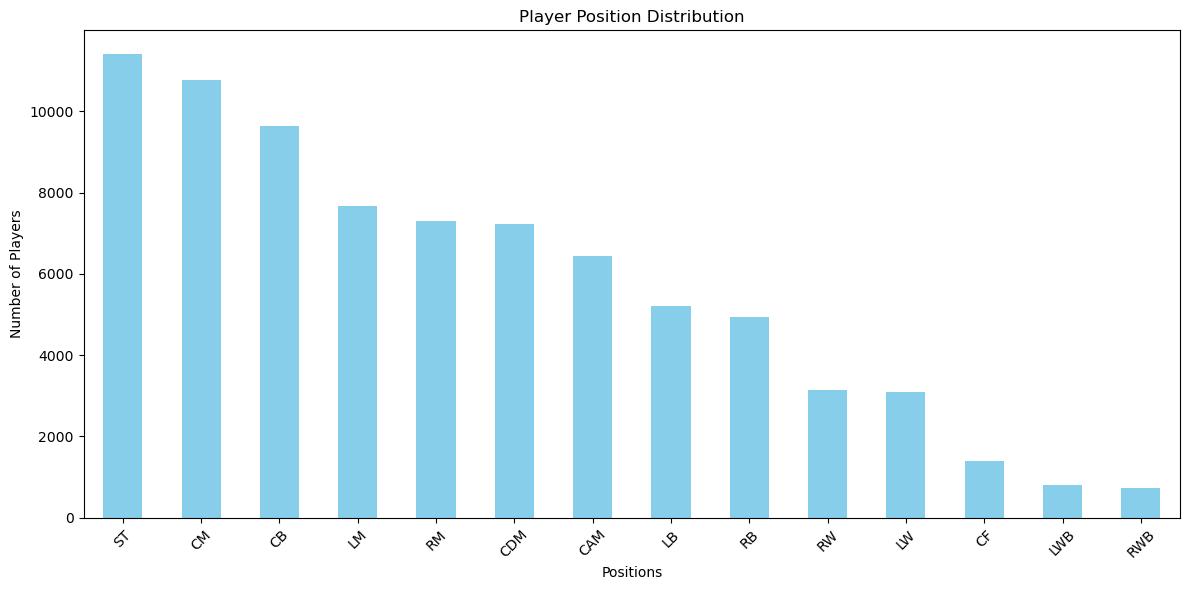

In [149]:
positions = mergedFifaAndMarketVal['player_positions'].str.get_dummies(sep=', ')

position_counts = positions.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Player Position Distribution')
plt.xlabel('Positions')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

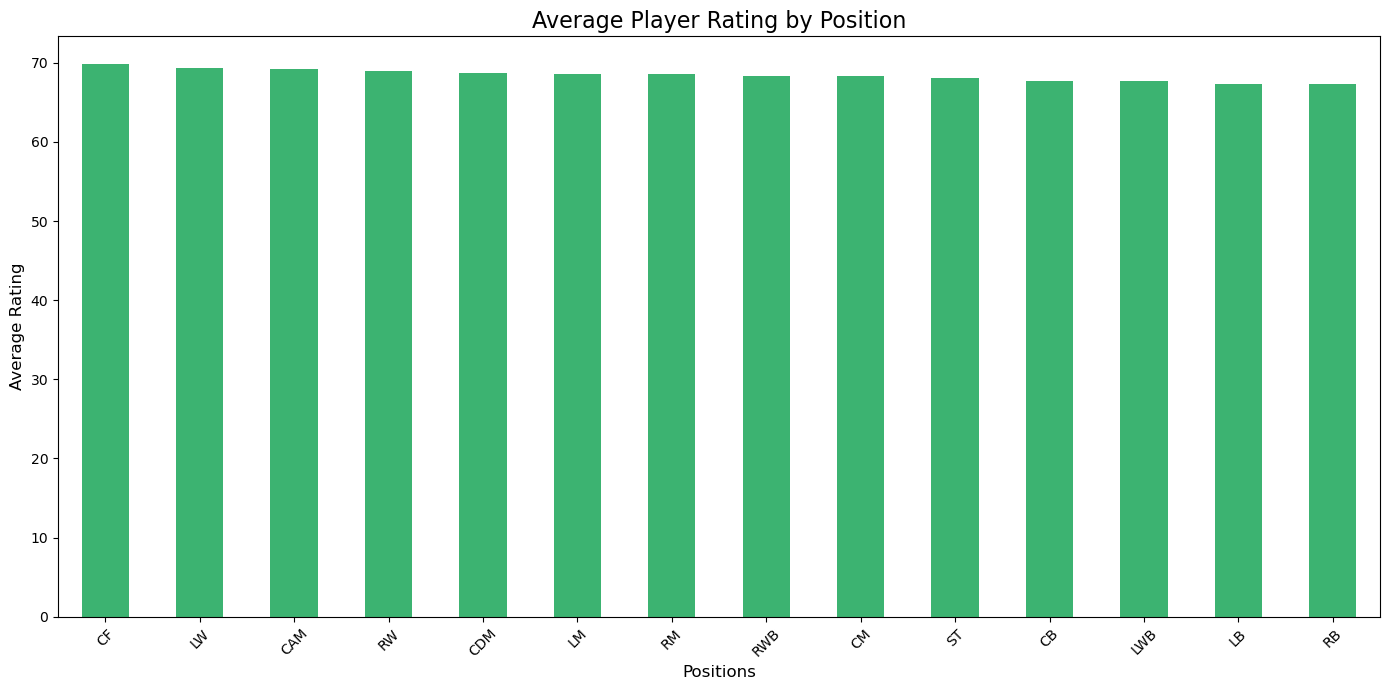

In [151]:
positions = mergedFifaAndMarketVal['player_positions'].str.get_dummies(sep=', ')

position_ratings = positions.T.dot(mergedFifaAndMarketVal['overall'])

position_avg_rating = position_ratings / positions.sum()

position_avg_rating = position_avg_rating.sort_values(ascending=False)

plt.figure(figsize=(14, 7))
position_avg_rating.plot(kind='bar', color='mediumseagreen')
plt.title('Average Player Rating by Position', fontsize=16)
plt.xlabel('Positions', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

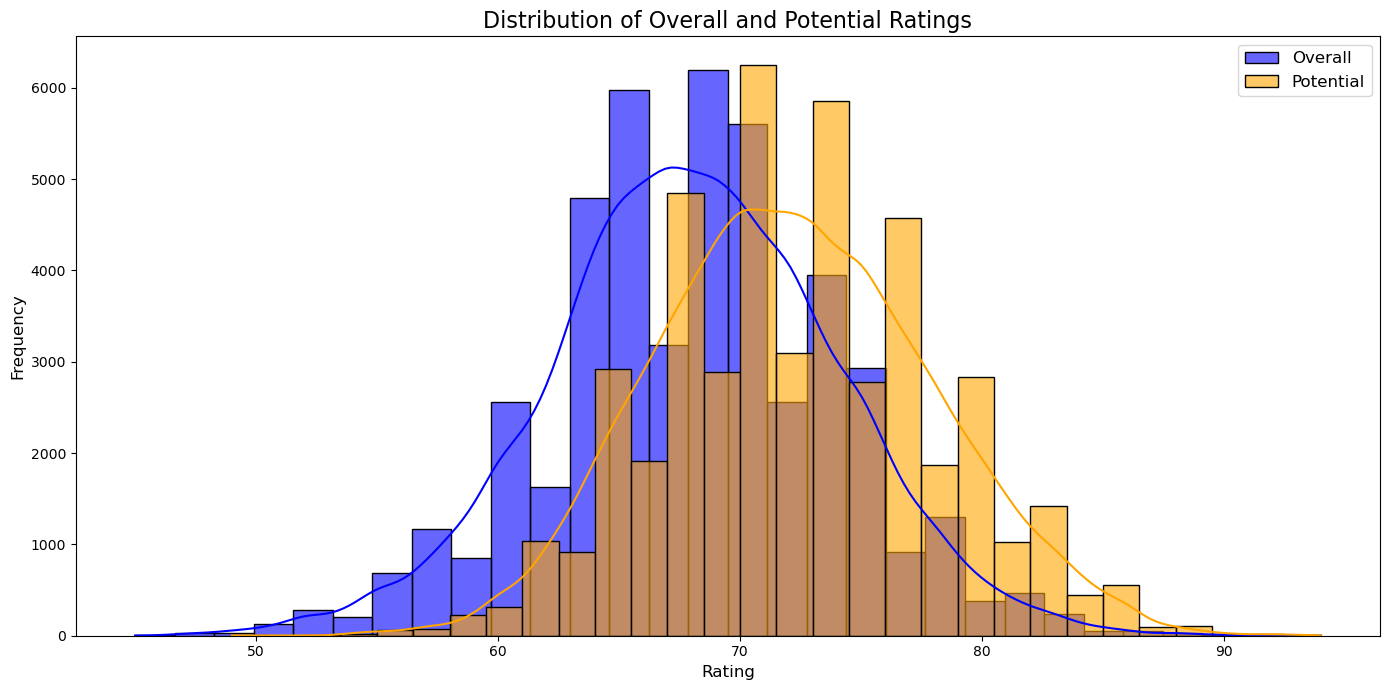

In [153]:
plt.figure(figsize=(14, 7))

sns.histplot(mergedFifaAndMarketVal['overall'], kde=True, color='blue', bins=30, label='Overall', alpha=0.6)

sns.histplot(mergedFifaAndMarketVal['potential'], kde=True, color='orange', bins=30, label='Potential', alpha=0.6)

plt.title('Distribution of Overall and Potential Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

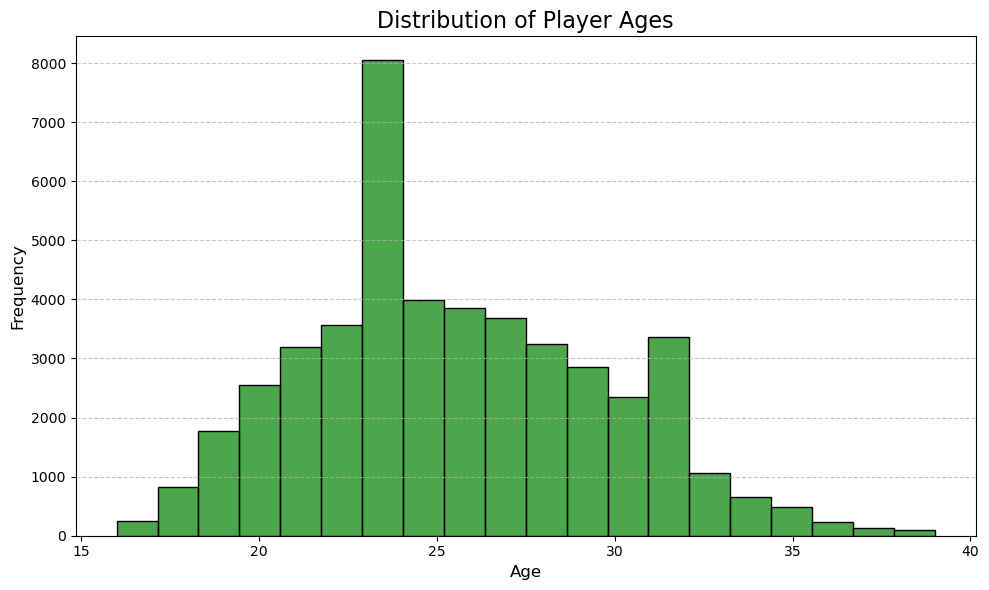

In [155]:
plt.figure(figsize=(10, 6))

sns.histplot(mergedFifaAndMarketVal['age'], bins=20, kde=False, color='green', alpha=0.7)

plt.title('Distribution of Player Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

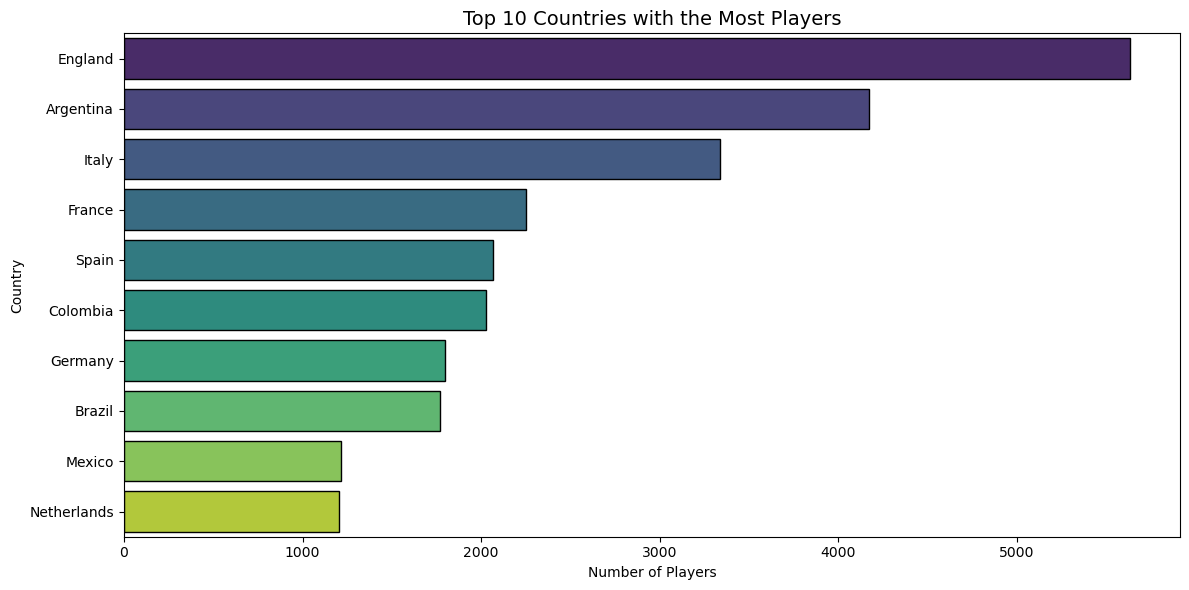

In [157]:
top_countries = (
    mergedFifaAndMarketVal.groupby("nationality_name")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="player_count")
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_countries,
    x="player_count",
    y="nationality_name",
    hue="nationality_name",  
    dodge=False,  
    edgecolor="black",
    palette="viridis",
    legend=False 
)
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Most Players", fontsize=14)
plt.tight_layout()
plt.show()

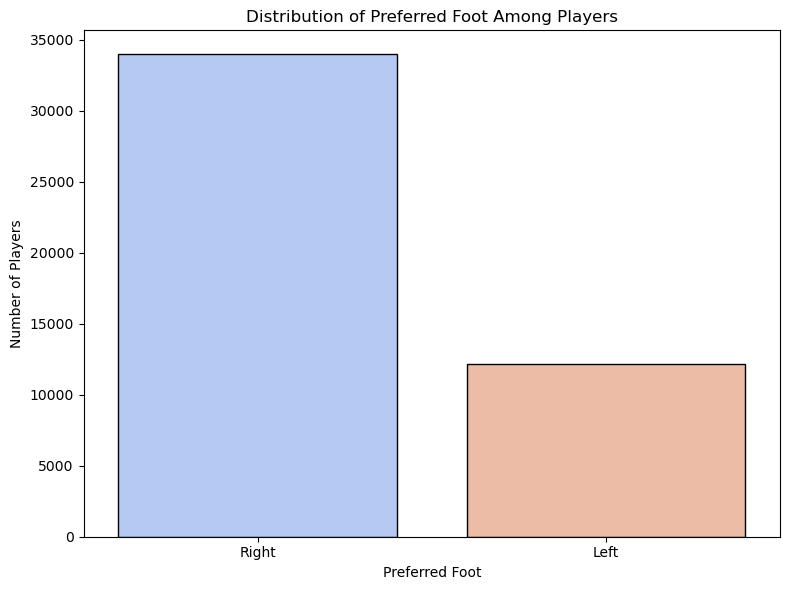

In [159]:
foot_preference = mergedFifaAndMarketVal["preferred_foot"].value_counts().reset_index()
foot_preference.columns = ["preferred_foot", "count"]

plt.figure(figsize=(8, 6))
sns.barplot(
    data=foot_preference,
    x="preferred_foot",
    y="count",
    hue="preferred_foot",  
    dodge=False,
    palette="coolwarm",
    edgecolor="black",
    legend=False
)
plt.xlabel("Preferred Foot")
plt.ylabel("Number of Players")
plt.title("Distribution of Preferred Foot Among Players")
plt.tight_layout()
plt.show()

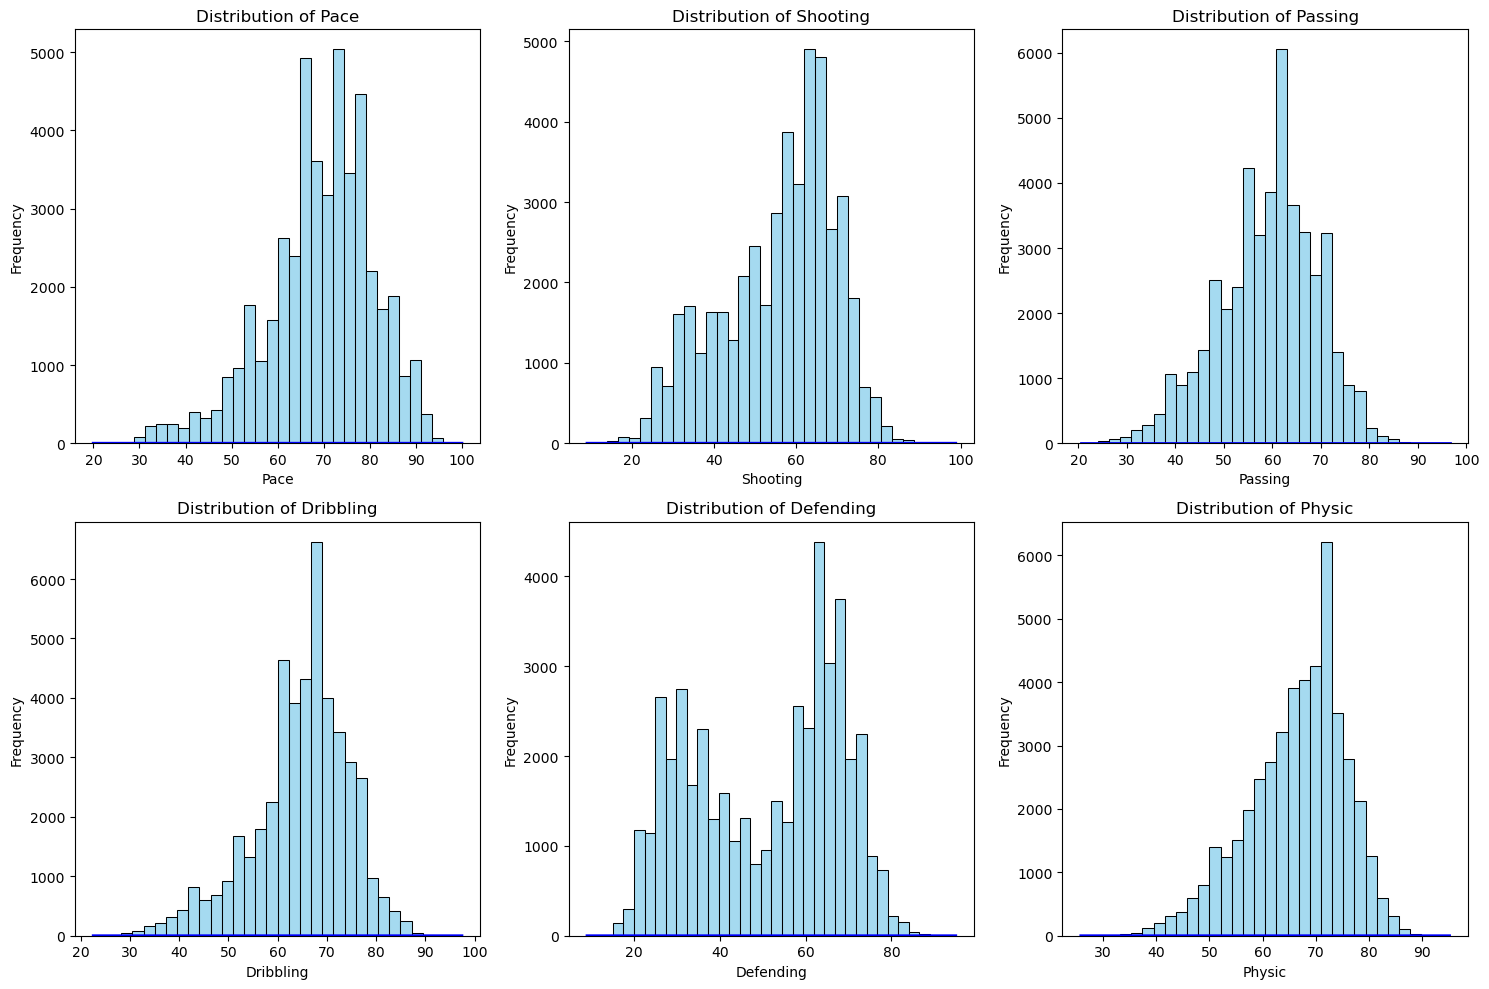

In [161]:
skills = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]

plt.figure(figsize=(15, 10))
for i, skill in enumerate(skills, 1):
    plt.subplot(2, 3, i)
    sns.histplot(mergedFifaAndMarketVal[skill], bins=30, color="skyblue", edgecolor="black", kde=False)
    sns.kdeplot(mergedFifaAndMarketVal[skill], color="blue", linewidth=2)
    plt.title(f"Distribution of {skill.capitalize()}")
    plt.xlabel(skill.capitalize())
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

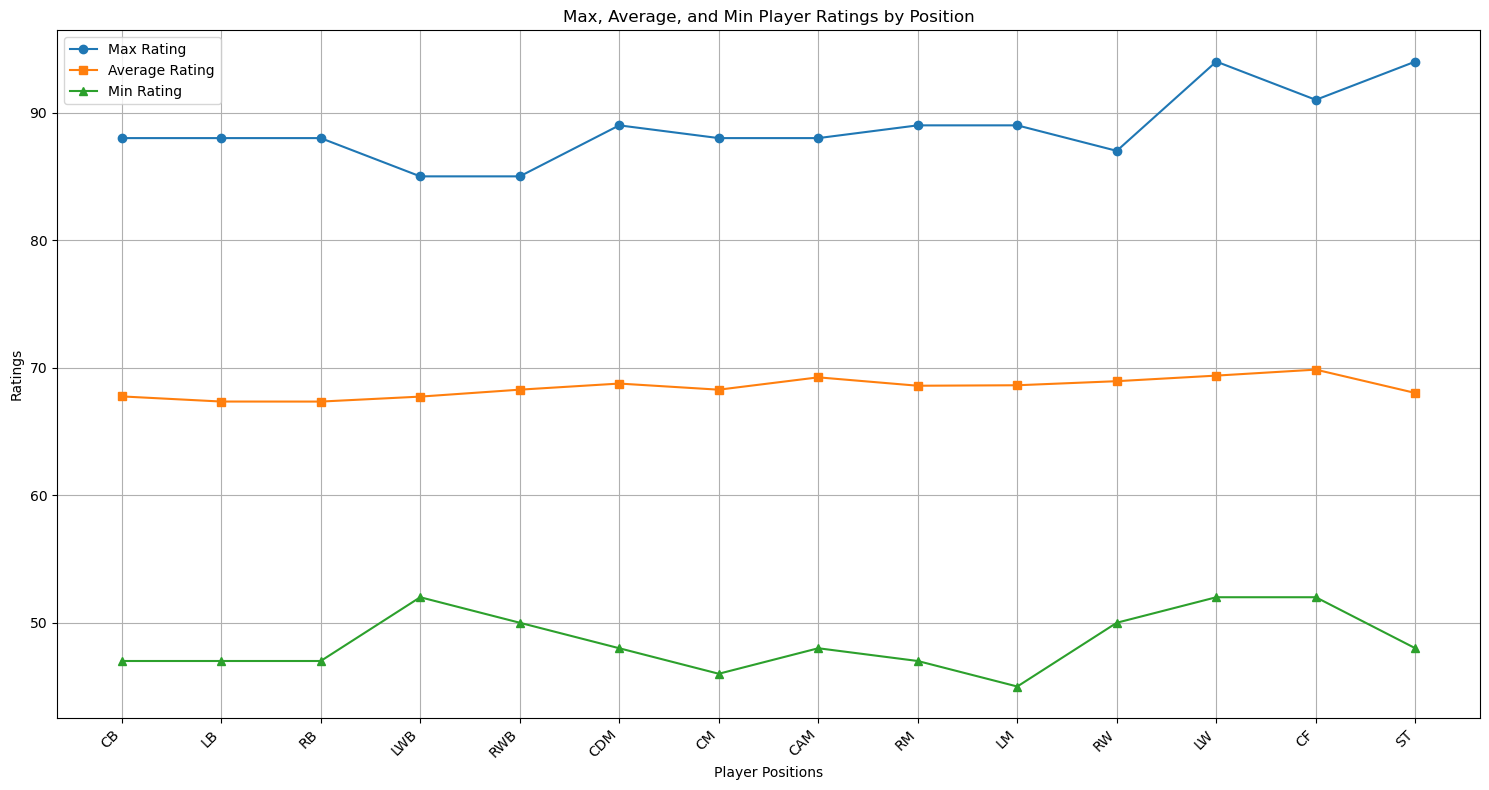

In [163]:
position_df = mergedFifaAndMarketVal["player_positions"].str.get_dummies(sep=", ")

rating_data = []

for position in position_df.columns:
    position_ratings = mergedFifaAndMarketVal.loc[position_df[position] == 1, "overall"]
    
    rating_data.append({
        "position": position,
        "max": position_ratings.max(),
        "mean": position_ratings.mean(),
        "min": position_ratings.min()
    })

rating_by_position = pd.DataFrame(rating_data)

custom_order = ["GK", "CB", "LB", "RB", "LWB", "RWB", "CDM", "CM", "CAM", "RM", "LM", "RW", "LW", "CF", "ST"]

rating_by_position["position"] = pd.Categorical(
    rating_by_position["position"],
    categories=custom_order,
    ordered=True
)

rating_by_position = rating_by_position.sort_values(by="position")

plt.figure(figsize=(15, 8))

plt.plot(rating_by_position["position"], rating_by_position["max"], label="Max Rating", marker='o')

plt.plot(rating_by_position["position"], rating_by_position["mean"], label="Average Rating", marker='s')

plt.plot(rating_by_position["position"], rating_by_position["min"], label="Min Rating", marker='^')

plt.xlabel("Player Positions")
plt.ylabel("Ratings")
plt.title("Max, Average, and Min Player Ratings by Position")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
mergedFifaAndMarketVal.to_csv('fixed_names_and_clubs_transfer.csv', index=False, encoding='utf-8')